In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT A.GISJOIN, 
A.CL8AA1990 AS pop90,
A.CL8AA2000 AS pop00,
A.CL8AA2010 AS pop10,
B.B84AD1990 AS emp90,
B.B84AD2000 AS emp00,
B.B84AD125 AS emp125
FROM nhgis_pop_race_norm_90_10 AS A JOIN county_employment AS B
ON A.GISJOIN = B.GISJOIN
WHERE B.B84AD2000 <> '' AND B.B84AD1990 <> ''
;
'''
df = pd.read_sql(qry, con, index_col="GISJOIN")
con.close()
df.head()

,pop90,pop00,pop10,emp90,emp00,emp125
GISJOIN,,,,,,
G0100010,34223.68,43672.90,54571,15432,19595,24125
G0100030,98280.00,140415.00,182265,43005,62938,81065
G0100050,25417.62,29038.85,27457,10313,10193,9177
G0100070,16610.89,20826.41,22915,6725,7967,8615
G0100090,39251.65,51028.61,57322,17568,22701,23671


In [11]:
len(df)

3134

In [12]:
df.dtypes

pop90     float64
pop00     float64
pop10       int64
emp90       int64
emp00       int64
emp125      int64
dtype: object

In [16]:
# scatter employment 00 against 12
df.describe()

,pop90,pop00,pop10,emp90,emp00,emp125
count,3.134000e+03,3.134000e+03,3.134000e+03,3.134000e+03,3.134000e+03,3.134000e+03
mean,7.872616e+04,8.905882e+04,9.769492e+04,3.661984e+04,4.109452e+04,4.493450e+04
std,2.619843e+05,2.901878e+05,3.103729e+05,1.255092e+05,1.297352e+05,1.446387e+05
min,1.070000e+02,6.700000e+01,8.200000e+01,4.100000e+01,4.200000e+01,5.400000e+01
25%,1.036950e+04,1.127000e+04,1.115950e+04,4.104250e+03,4.624000e+03,4.619500e+03
50%,2.222385e+04,2.466919e+04,2.590150e+04,9.219000e+03,1.069700e+04,1.076300e+04
75%,5.475673e+04,6.178396e+04,6.697200e+04,2.385400e+04,2.773100e+04,2.932050e+04
max,8.862994e+06,9.519099e+06,9.818605e+06,4.203792e+06,3.953415e+06,4.495118e+06


In [18]:
# calc pct change in employment and pop
df['ppctchg_0010'] = ( df['pop10'] - df['pop00'] ) * 1.0 / df['pop00'] * 100

df['eppctchg_0012'] = ( df['emp125'] - df['emp00'] ) * 1.0 / df['emp00'] * 100

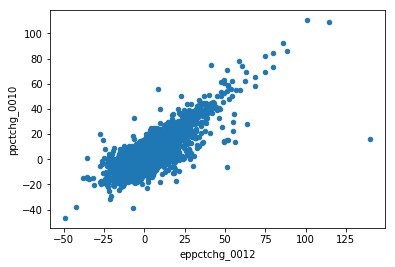

In [21]:
# plot change in employed pop to change in pop
df.plot.scatter('eppctchg_0012', 'ppctchg_0010')

It is not surprising that these two things closely correspond to each other, as loss of pop usually means loss of employed pop. So does jobs data from BLS get us somewhere better? 